### Necessary Imports

In [13]:
# Import pandas and matplotlib
import pandas as pd
from matplotlib import pyplot as plt

### Reading Data

In [14]:
# Read the dataset
df = pd.read_csv("price-prediction.csv")
print(df.head())

   PLOTS   PRICE
0    120  550000
1    145  645000
2    160  700000
3    110  475000
4    180  825000


### Visualize Datapoints in Data

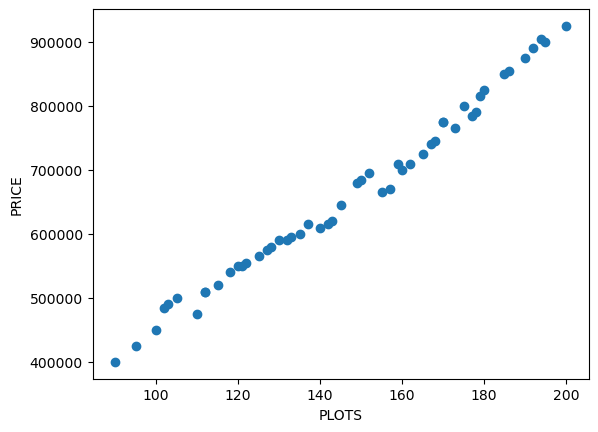

In [15]:
# Plot the dataset
x = df['PLOTS']
y = df['PRICE']
plt.scatter(x,y)
plt.xlabel('PLOTS')
plt.ylabel('PRICE')
plt.show()

### Some Base Functions

In [27]:
def plot_data(m, b, data):
    # Plot the data points as a scatter plot
    x = data['PLOTS']
    y = data['PRICE']
    plt.scatter(x,y)
    # Find min and max values in the data
    minimum = min(x)
    maximum = max(x)
    # Plot the line defined by y = m * x + b
    plt.plot(list(range(minimum,maximum)),[m*x + b for x in range(minimum,maximum)],color="red")
    # Set the labels for the x and y axes
    plt.xlabel('PLOTS')
    plt.ylabel('PRICE')
    # Set the title for the plot
    plt.title('Linear Regression')
    # Display the plot
    plt.show()

In [28]:
def loss_function(m, c, points):
    # Initialize the total error to 0
    total_error = 0
    # Loop through all the points in the dataset
    for indx in points.index:
        # Get the 'x' and 'y' values of the current 'point'   
        x = points['PLOTS'][indx]
        y = points['PRICE'][indx]
        # Calculate the error for this point and add it to the total error
        error = y - ((m*x)+c)
        total_error = total_error + error
    # Return the average error for all points
    N = df['PLOTS'].count()
    return total_error/N

In [32]:
# Formula of slope: -1/N * x * (y - (m * x + b))
# Formula of y_intercept: -1/N * (y - (m * x + b))

def gradien_descent(current_m, current_b, points, lr):
    # Initialize the gradients for m and b to 0
    dm = 0
    db = 0
    # Get the number of points in the dataset
    N = df['PLOTS'].count()
    # Loop through all the points in the dataset
    for i in range(N):
        # Get the 'x' and 'y' values of the current 'point'
        x = points['PLOTS'][i]
        y = points['PRICE'][i]
        # Calculate the partial derivatives of the loss function with respect to m and b
        dm +=  -2 * x * (y - (current_m * x + current_b))
        db +=  -2 * (y - (current_m * x + current_b))
    # Update 'm' and 'b' using gradient descent
    new_m = current_m - (lr*dm)
    new_b = current_b - (lr*db)
    # Return the updated values of m and b
    return new_m, new_b

### Running Script

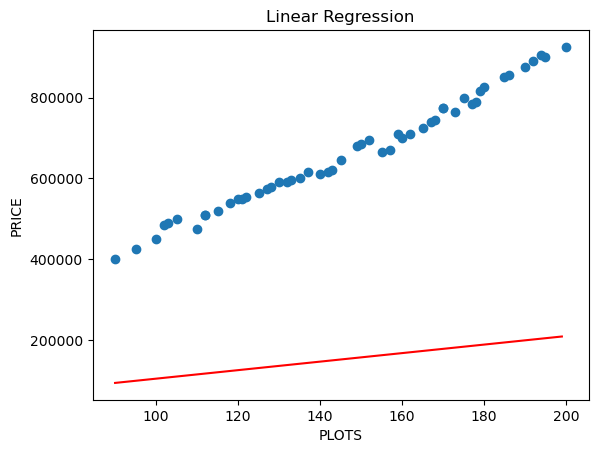

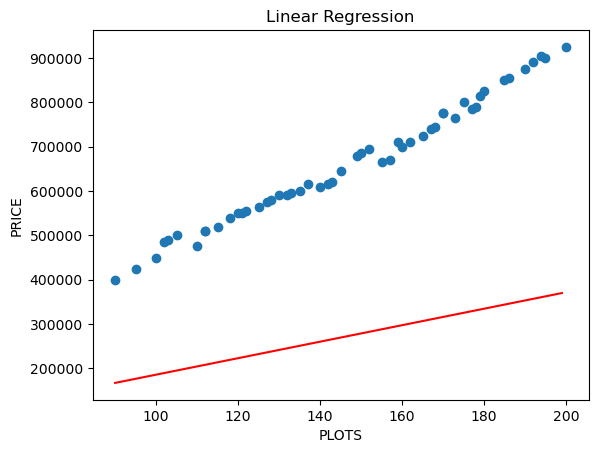

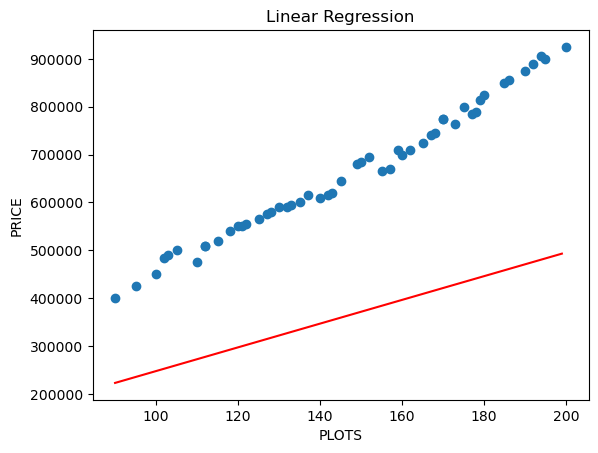

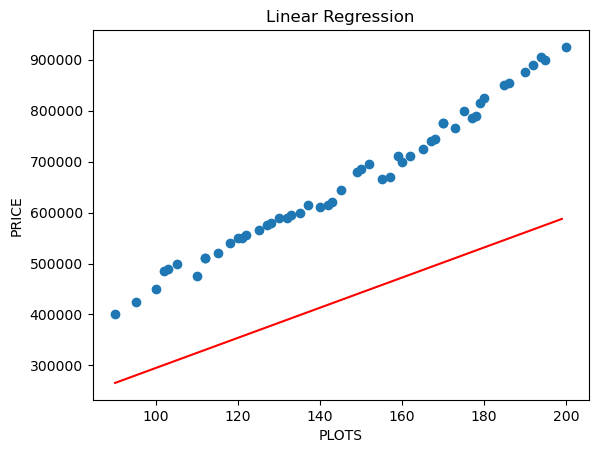

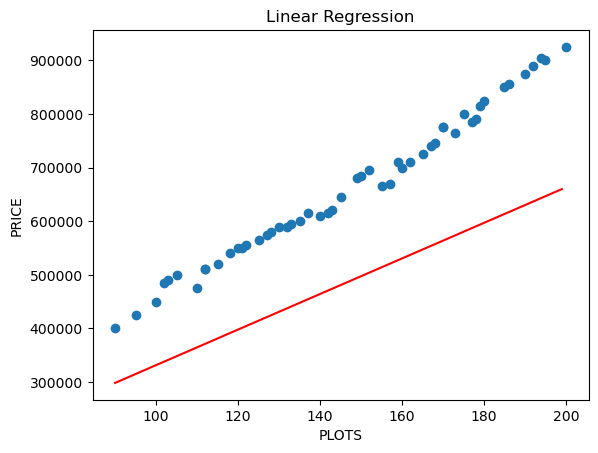

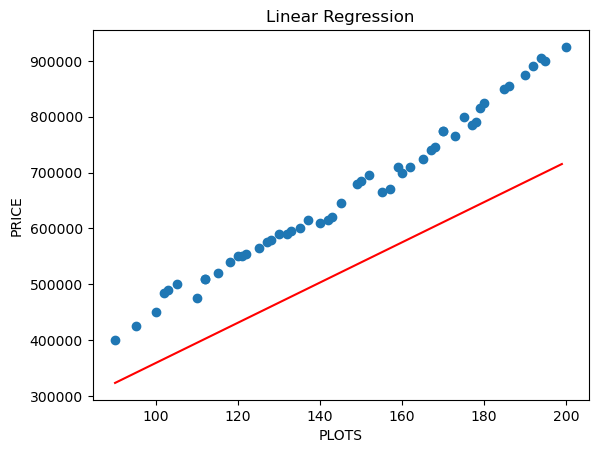

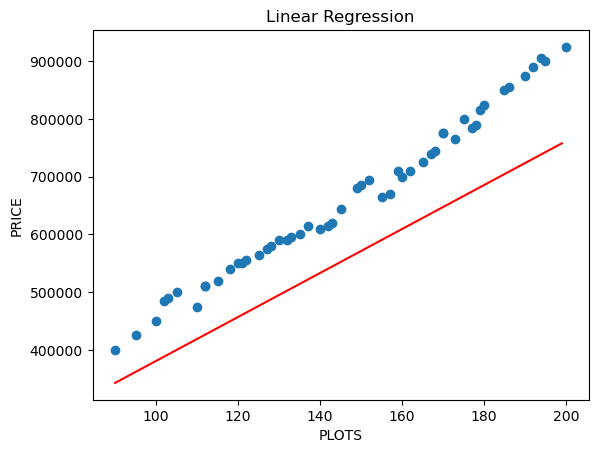

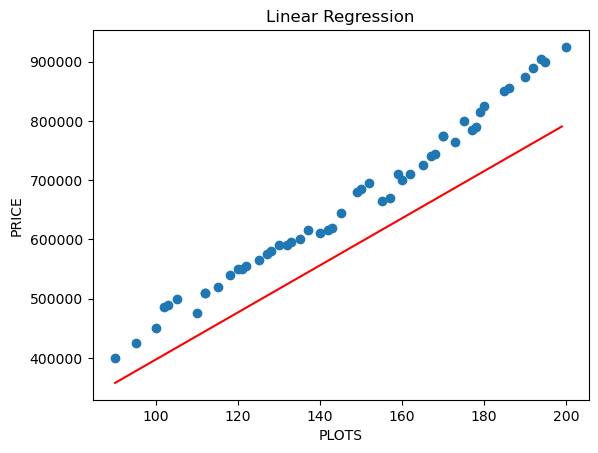

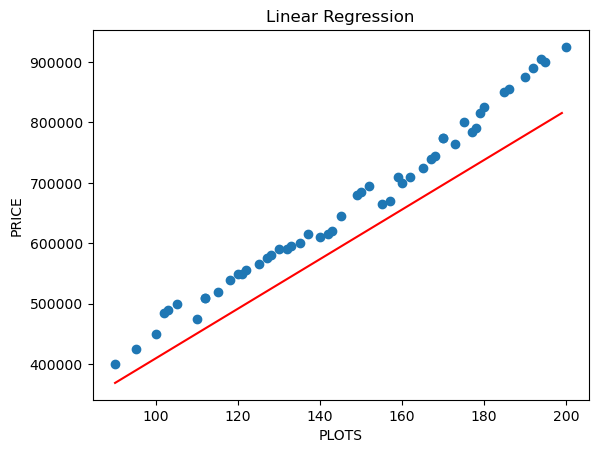

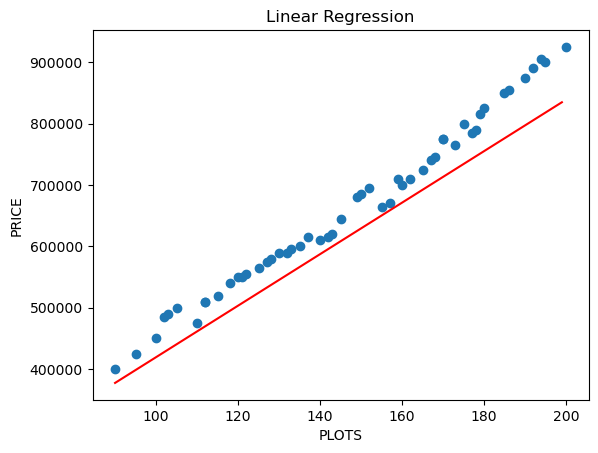

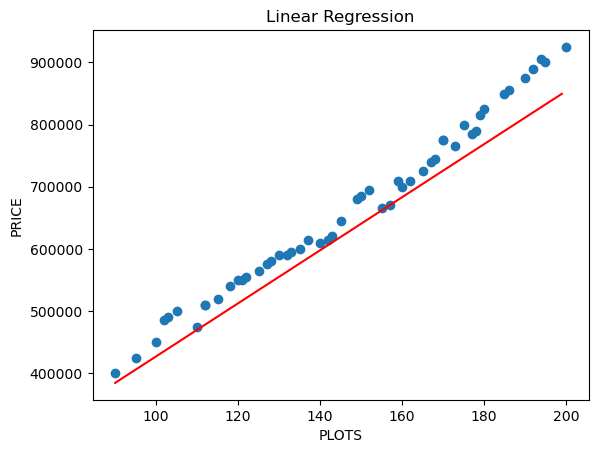

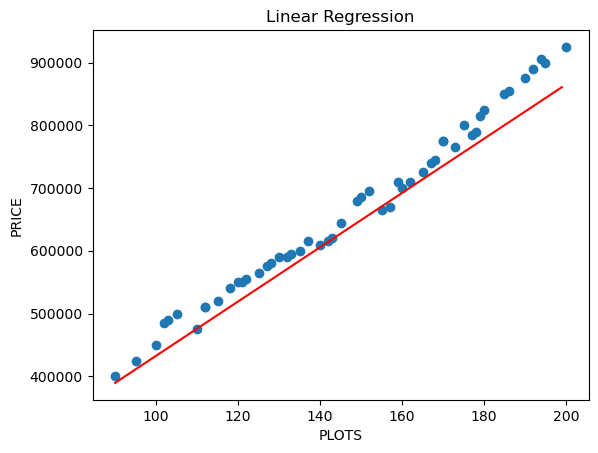

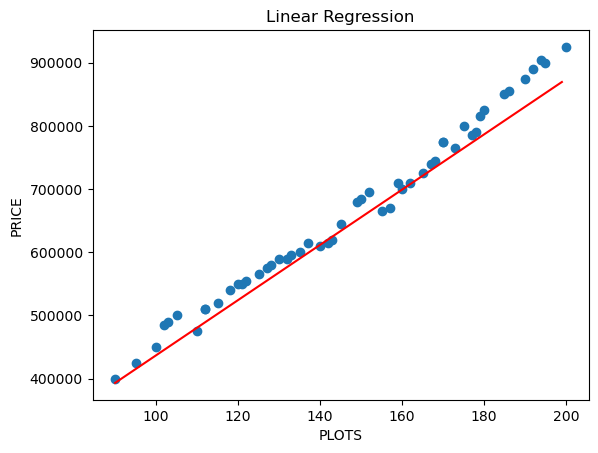

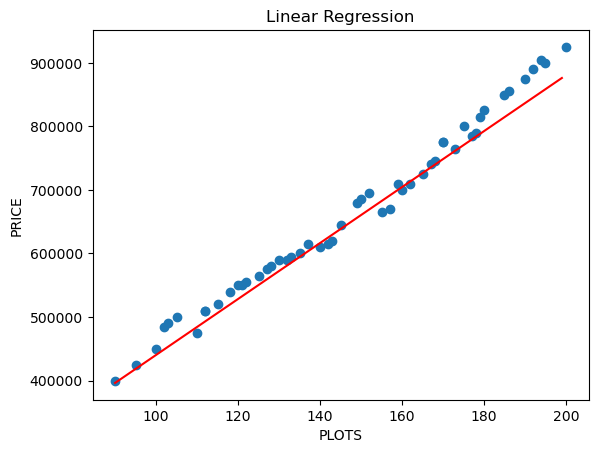

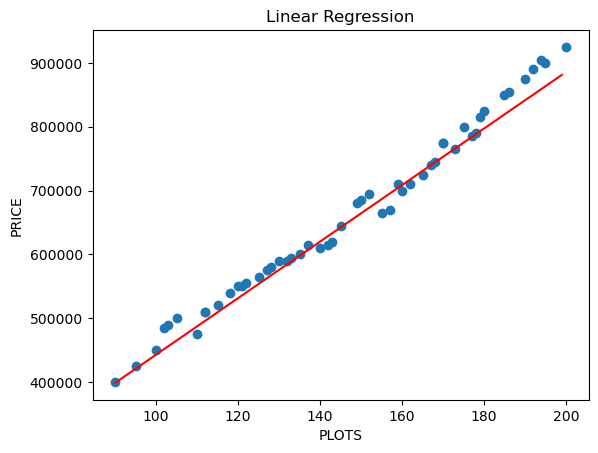

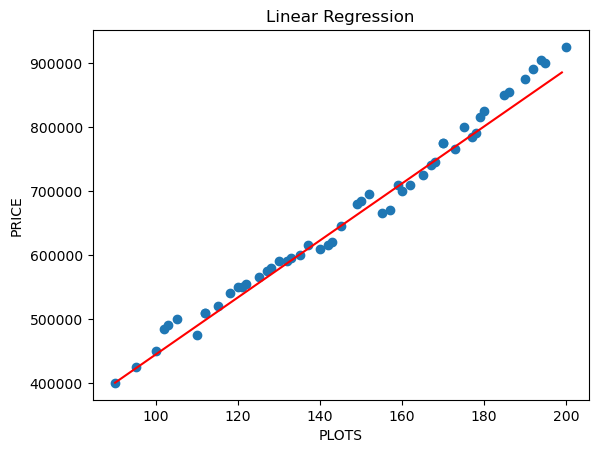

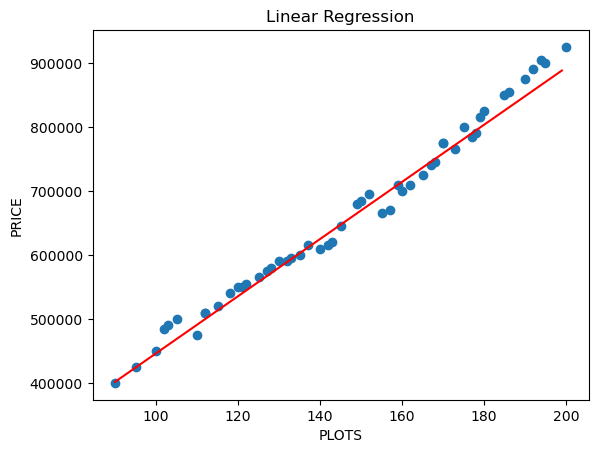

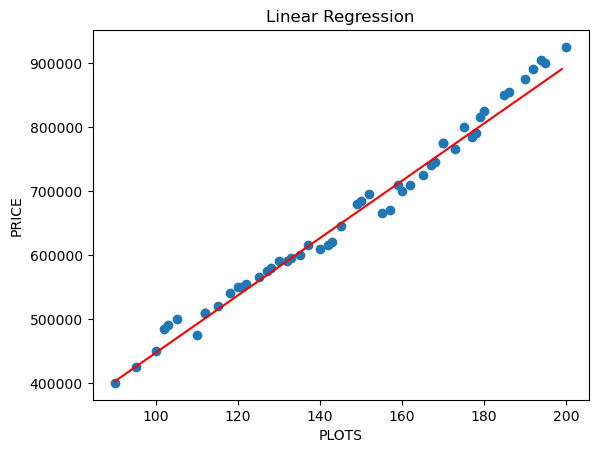

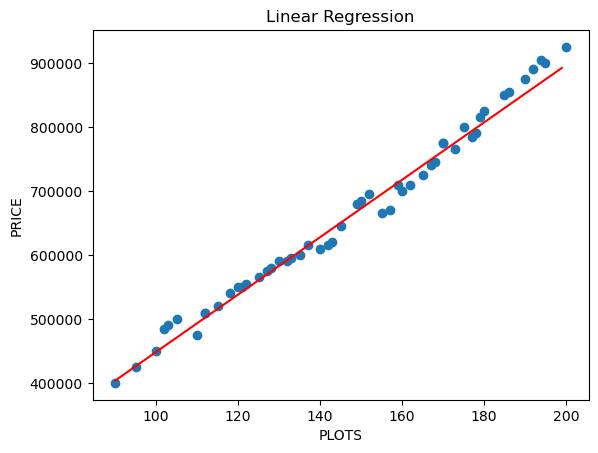

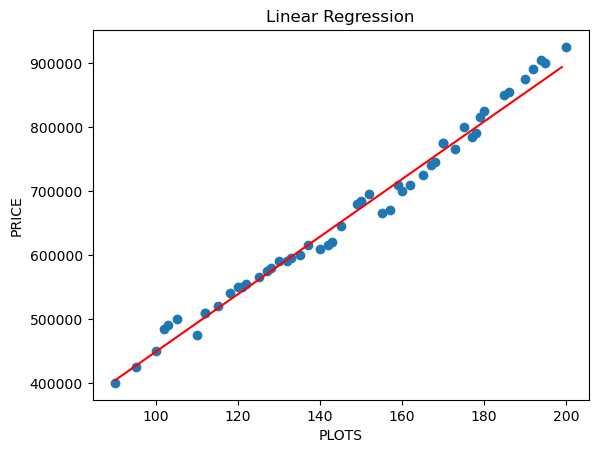

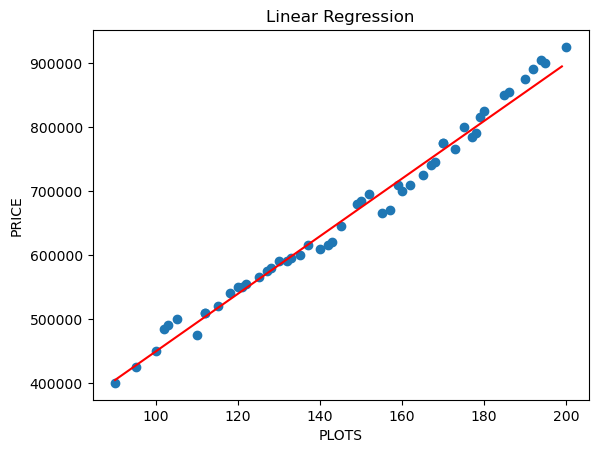

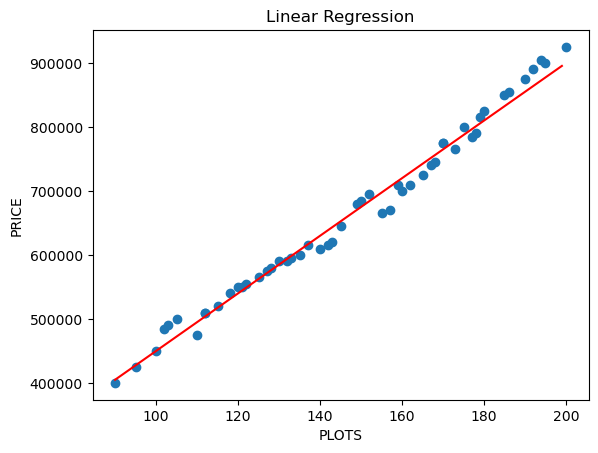

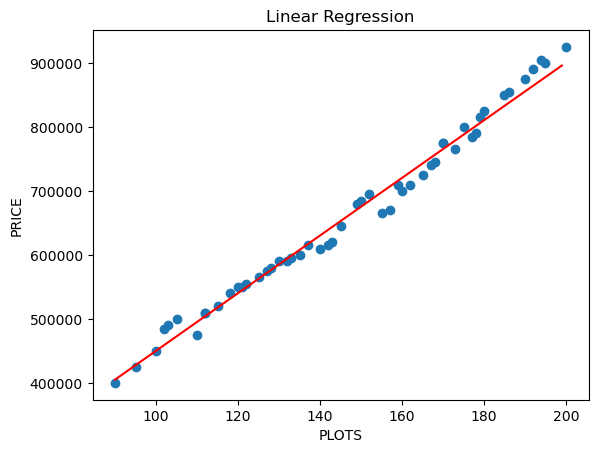

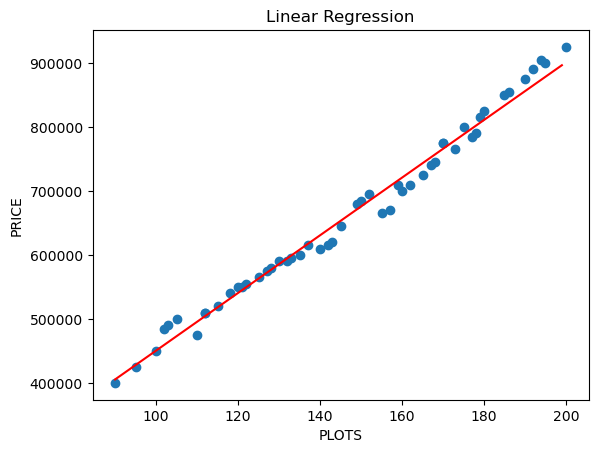

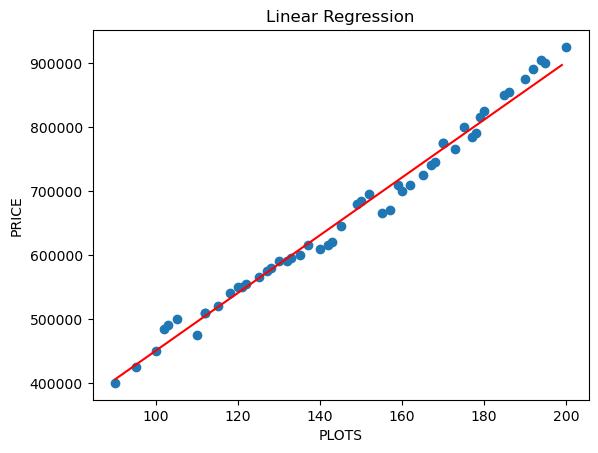

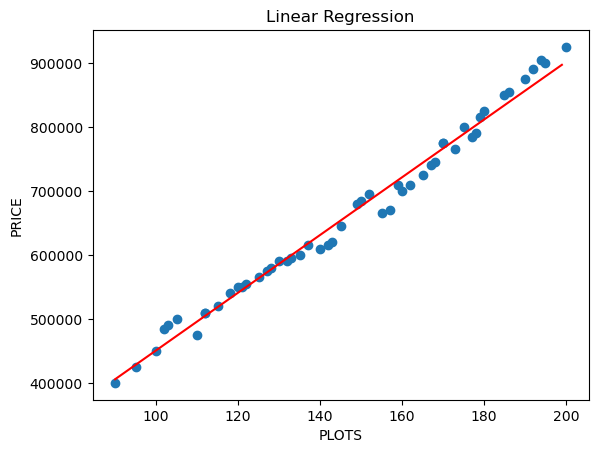

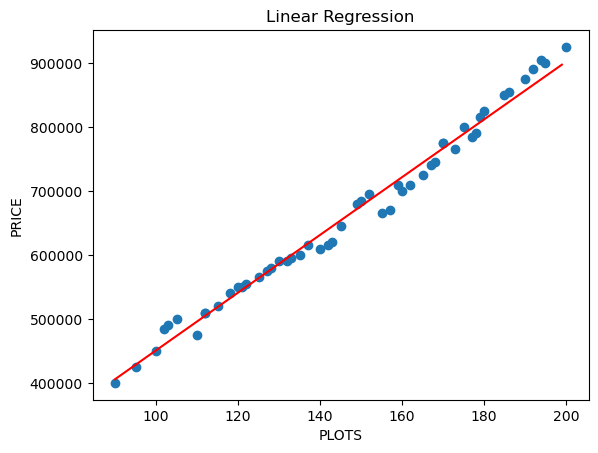

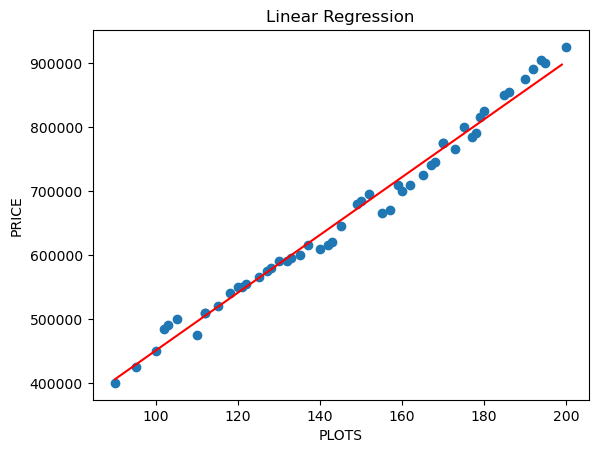

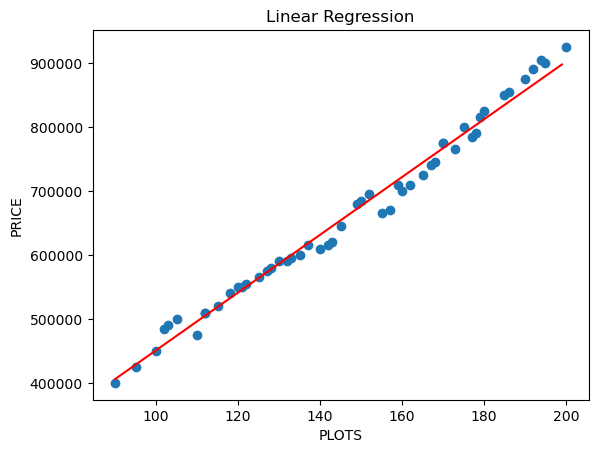

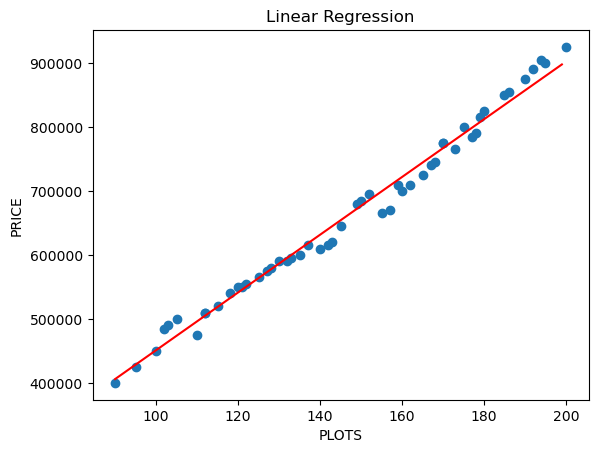

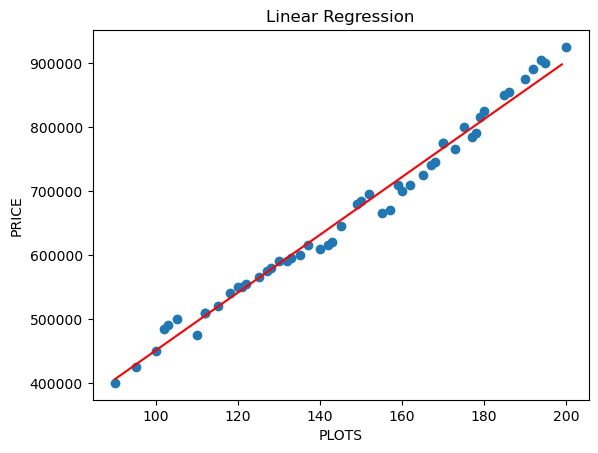

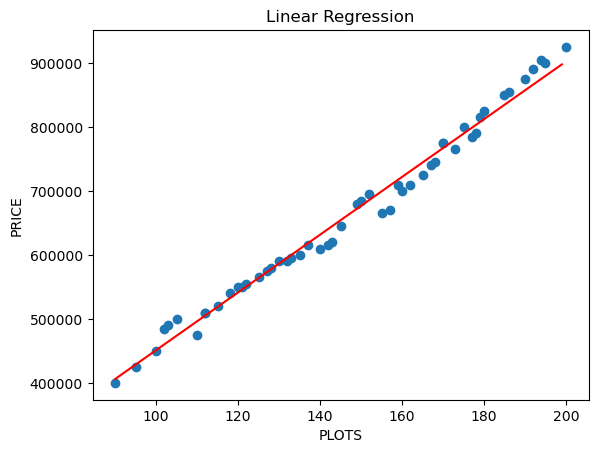

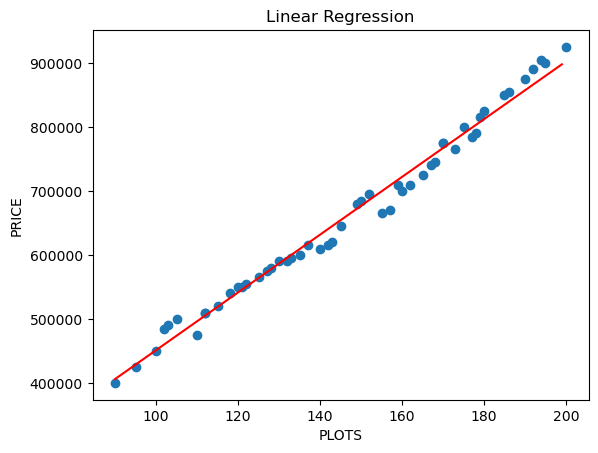

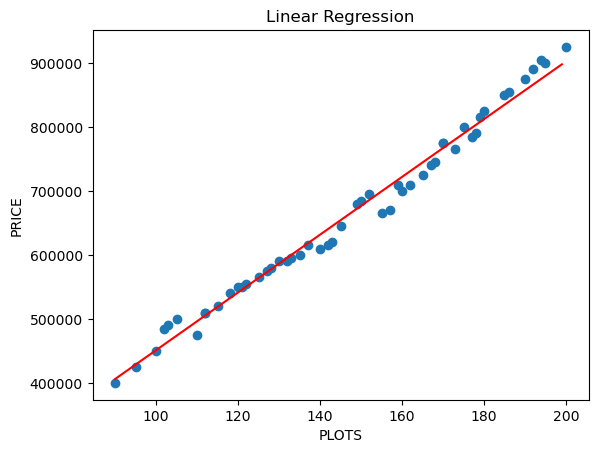

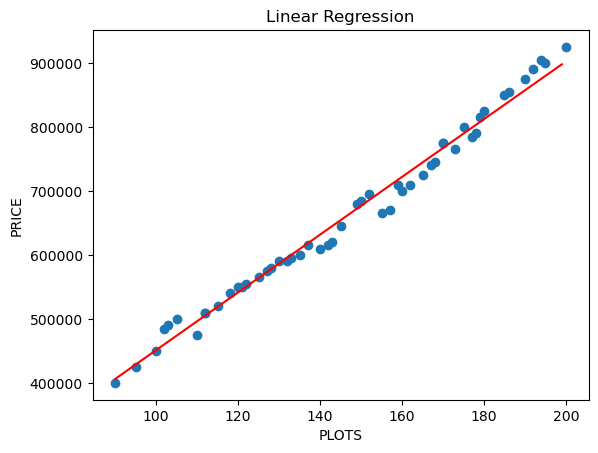

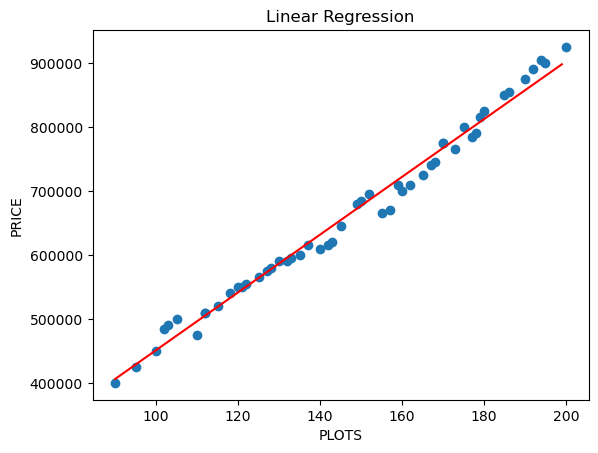

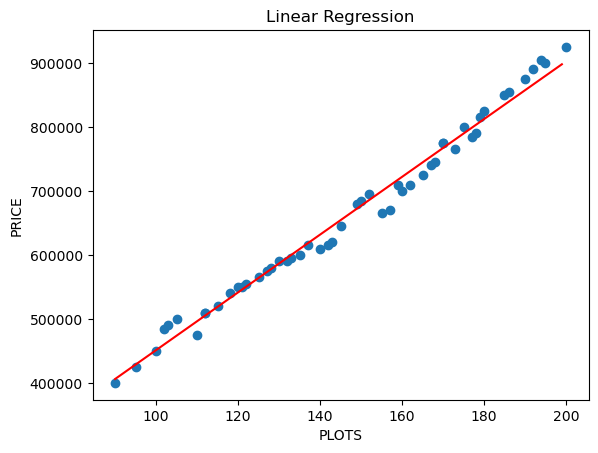

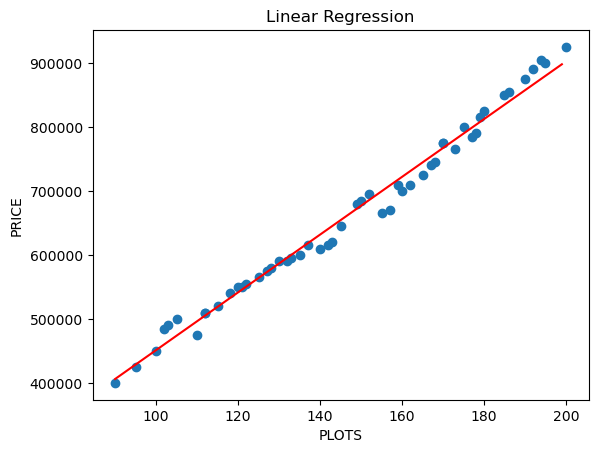

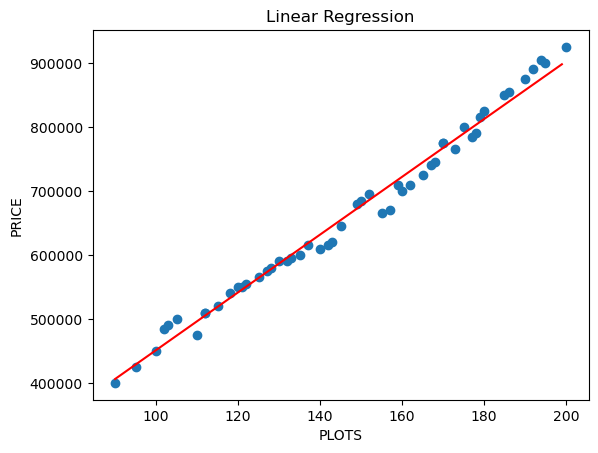

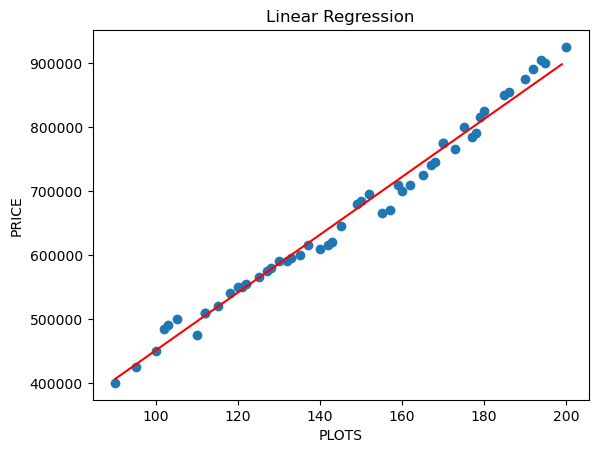

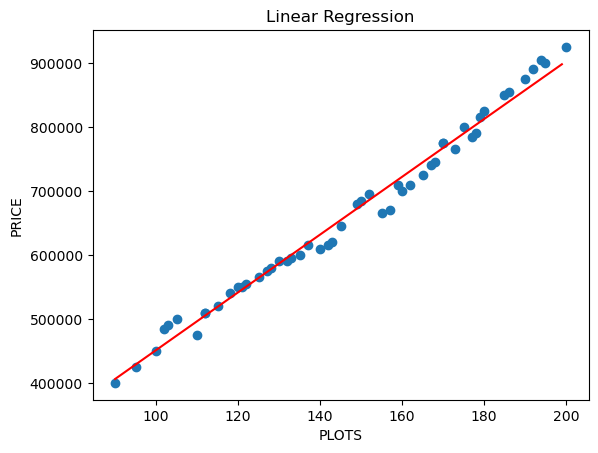

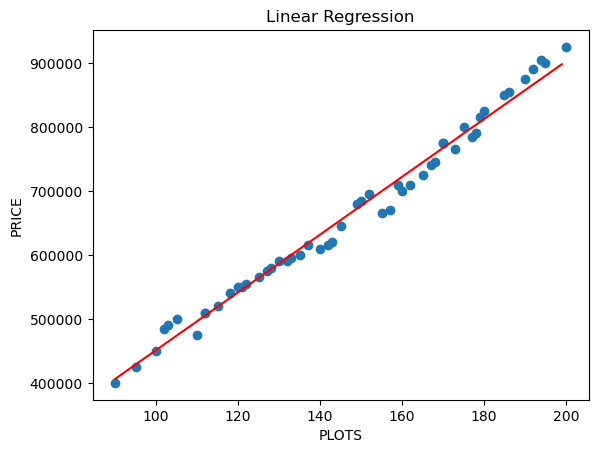

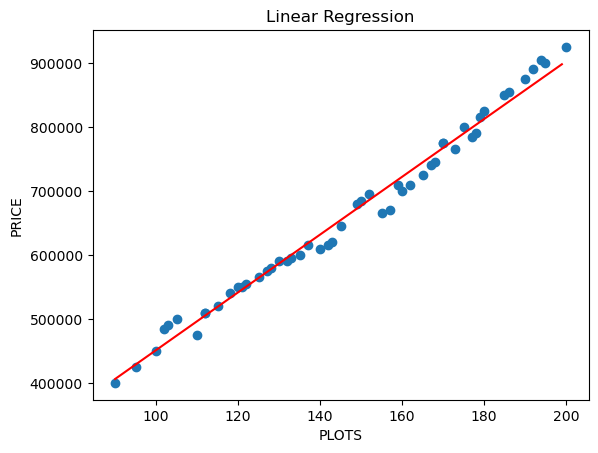

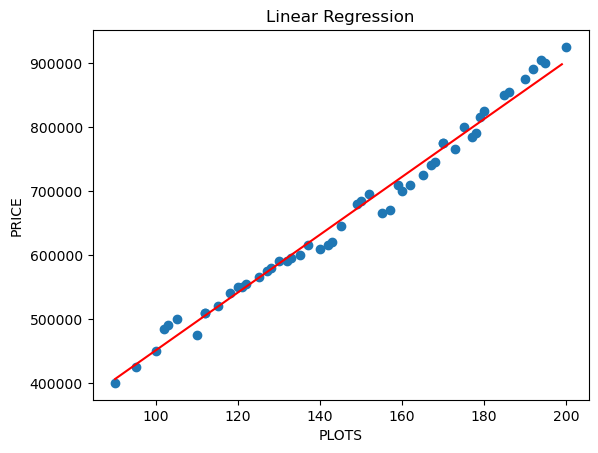

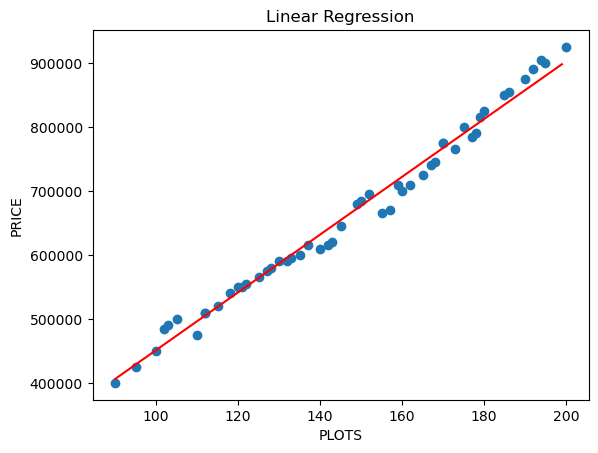

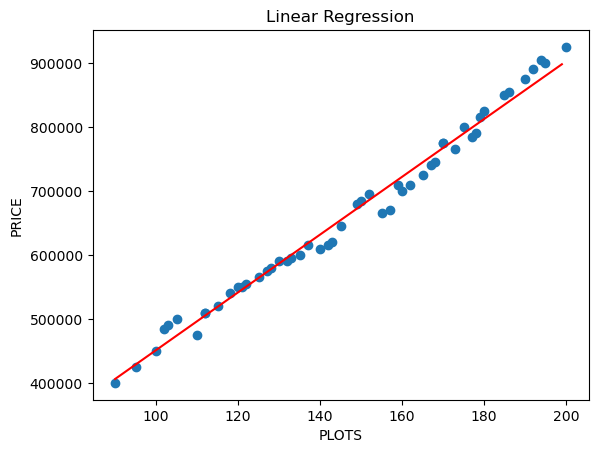

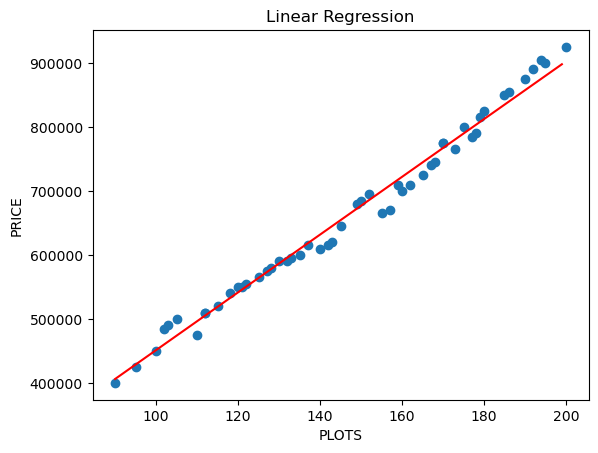

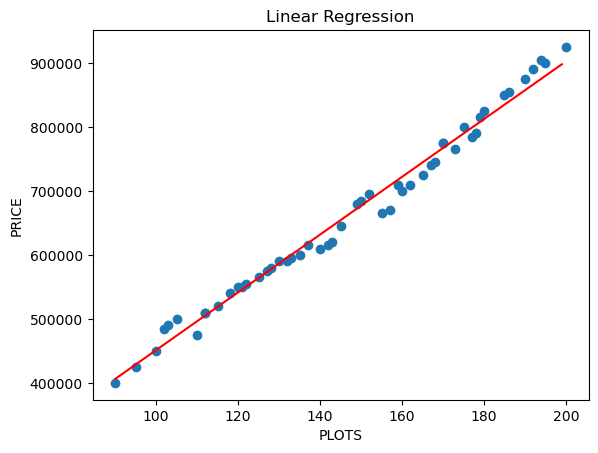

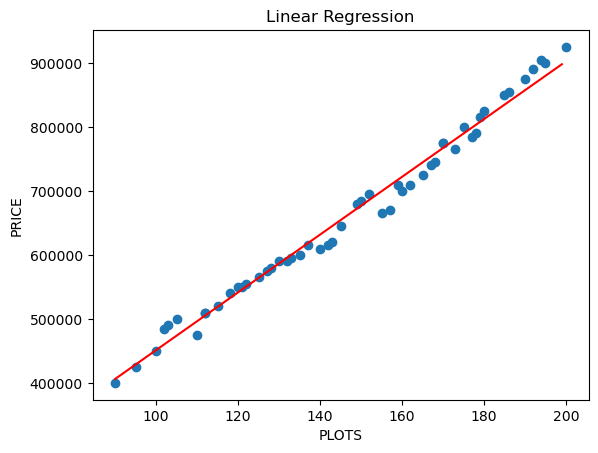

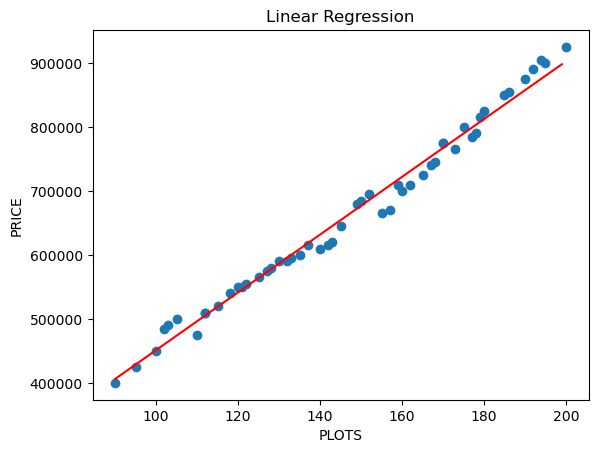

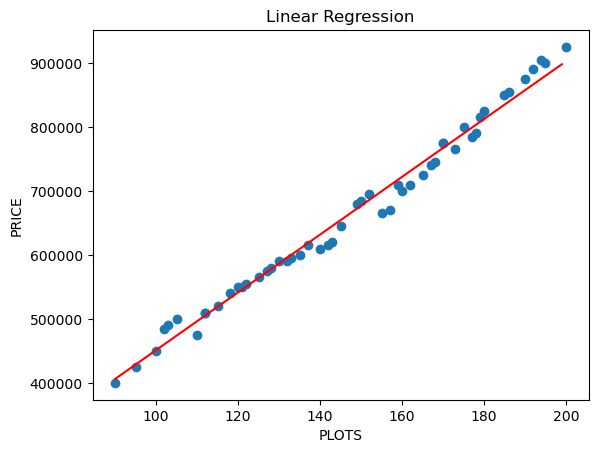

Final m is: 4512.121471314641
Final b is: 29.385351682709103


In [34]:
# Initialize the values of m and b to 0
m = 0
b = 0

# Set the learning rate and number of epochs for gradient descent
learning_rate = 0.0000001
epochs = 50

# Perform gradient descent for the specified number of epochs
for i in range(epochs):
    # Update m and b using gradient descent
    m, b = gradien_descent(m,b,df,learning_rate)
    # Plot the current data
    plot_data(m, b, df)
# Print the final values of m and b
plot_data(m, b, df)
print(f"Final m is: {m}")
print(f"Final b is: {b}")

### Predicting New Data

In [31]:
# Read a datapoint as 'x' from the user
x = int(input("Please Enter Value of X: "))
# Does a prediction by calculating mx+b
y = (m*x) + b
# Print the prediction
print(f'Price for {x} size of plot should be around $:{y}')

Please Enter Value of X: 155
Price for 155 size of plot should be around $:699407.268303938


<hr>